# resistivité du fil métallique


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display


Code de régression linéaire général: 

In [157]:
def lin_Reg(y,x):
    
    x = np.array(x) ; x_reshaped = x.reshape(-1,1) ; y = np.array(y)

    model = LinearRegression() ; model.fit(x_reshaped, y)

    y_pred = model.predict(x_reshaped)
    mse = mean_squared_error(y, y_pred)

    return y_pred, model.coef_[0], mse, model

## 1. Données expérimentales

In [158]:
#dimensions de l'échantillon
S = np.pi*((0.00017/2.0)**2) #[m^2]
L_HT = 0.05                #[m]
L_BT = 0.08                #[m]

#mesures jusqu'à 600 °C
U1 = [0.524, 2.247,4.150 ,4.848  ]
U2= [0.607, 2.191,4.175,4.930 ]

HTsamp = len(U1)
U_HT = np.zeros(4)
for i in range(HTsamp):
    U_HT[i] = (U1[i]+U2[i])/2

I_HT = [0.1,  0.5   ,1     ,1.2]
T= [30,  100   ,195  ,320 ]

#mesures à 'basse' température
I_BT = [0.08,0.15,0.21 ,0.25,0.29,0.34,0.40,0.45,0.49, 0.55,0.60,0.65,0.70,0.75 ]
U_BT = [0.453,0.764,1.1,1.3,1.47,1.76,2.02, 2.32, 2.52,2.78,3.02,3.26,3.58,3.78 ]

BTsamp = len(I_BT)


## 2. $V = RI$ Régression linéaire

In [159]:
UBT_pred, RBT,MSEBT,___ = lin_Reg(U_BT, I_BT)
UHT_pred, RHT,MSEHT,___ = lin_Reg(U_HT, I_HT)
rho_BT = RBT * S / L_BT
rho_HT = RHT * S / L_HT

RES = np.array([[rho_BT*1e06,RBT,MSEBT],[rho_HT*1e06,RHT,MSEHT]])
columns = ["Resistivity (ρ) [μΩ·m]", "Resistance (R) [Ω]", "MSE [V²]"]
index = ["Low Temperature (BT)", "High Temperature (HT)"]
RES_df = pd.DataFrame(RES, columns=columns, index=index)
display(RES_df)


,Resistivity (ρ) [μΩ·m],Resistance (R) [Ω],MSE [V²]
Low Temperature (BT),1.418265,4.998731,0.000509
High Temperature (HT),1.785260,3.932635,0.001299


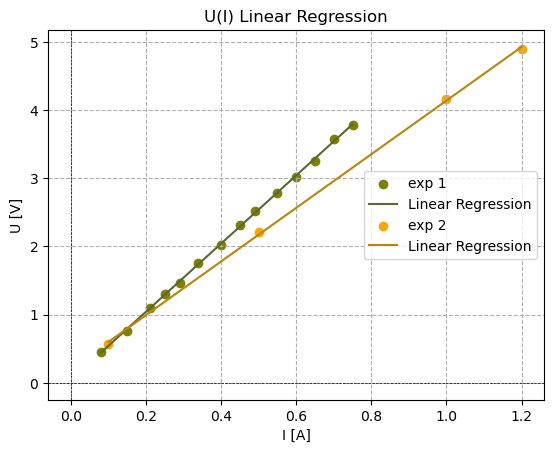

In [160]:
plt.scatter(I_BT, U_BT, color='olive', label='exp 1')
plt.plot(I_BT, UBT_pred, color='darkolivegreen', label='Linear Regression')
plt.scatter(I_HT, U_HT, color='orange', label='exp 2')
plt.plot(I_HT, UHT_pred, color='darkgoldenrod', label='Linear Regression')

plt.xlabel('I [A]')
plt.ylabel('U [V]')
plt.title('U(I) Linear Regression')
plt.legend()
plt.axhline(0, color='black',linestyle='dashed' , lw=0.5)
plt.axvline(0, color='black',linestyle='dashed', lw=0.5)
plt.grid(True, linestyle='dashed')
plt.show()

## 3. Trouver une relation U(T)

Comme on a pas de mesure de la température pour l'expérience en autonomie, Il faudrait interpoler un coubre sur base des 4 mesures faites en 'labo'. Comme on reste en dessous de 4 voltes, on peut approximer la relation par une droite et faire une régression linéaire

In [161]:
rho_BT_list = np.zeros(BTsamp)
rho_HT_list = np.zeros(HTsamp)

for i in range(BTsamp):
    rho_BT_list[i] = (U_BT[i]/I_BT[i]) * S / L_BT
for i in range(HTsamp):
    rho_HT_list[i] = (U_HT[i]/I_HT[i]) * S / L_HT
print(rho_HT_list)

[2.56714458e-06 2.01467509e-06 1.88960908e-06 1.84950926e-06]


C:\Users\roeke\AppData\Local\Temp\ipykernel_19656\485255510.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
C:\Users\roeke\AppData\Local\Temp\ipykernel_19656\485255510.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


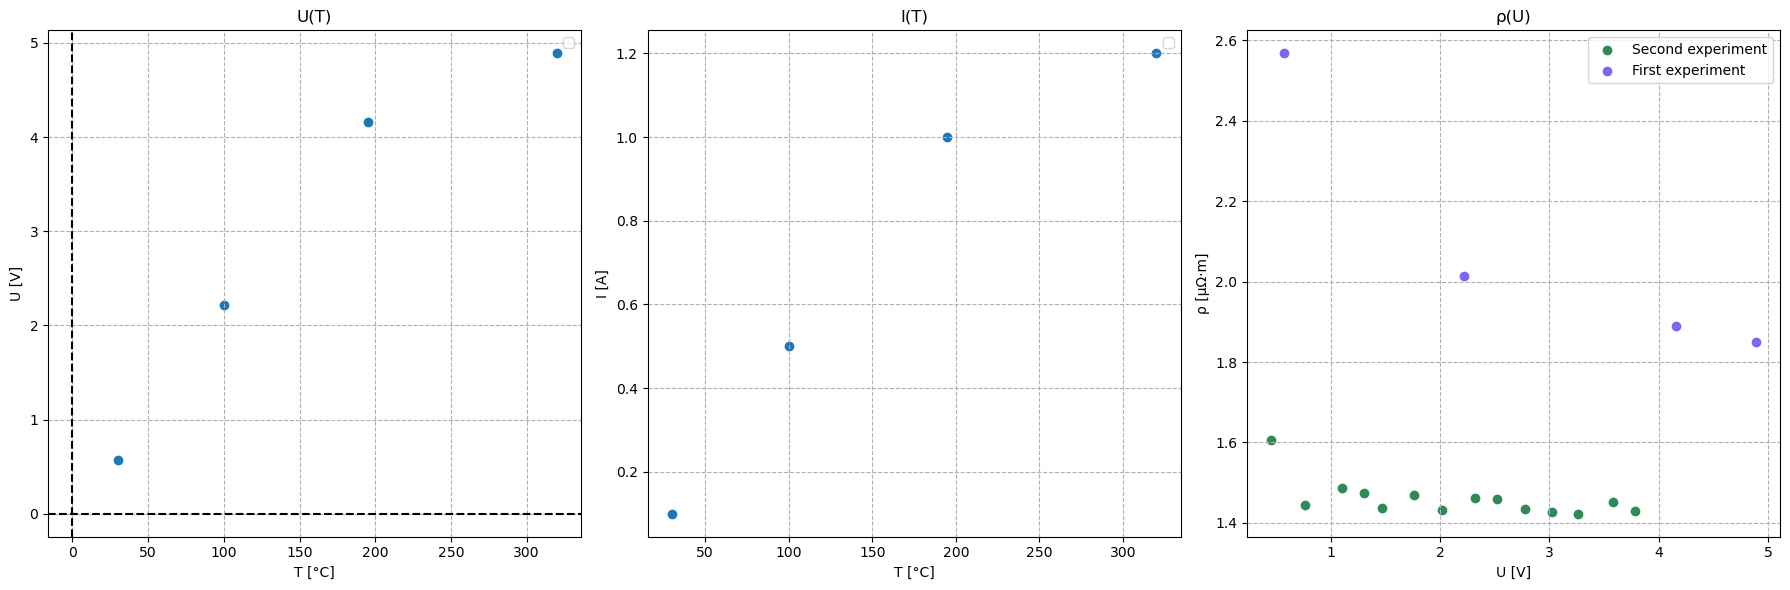

In [162]:

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First graph: U(T)
axes[0].scatter(T, U_HT)
axes[0].set_xlabel('T [°C]')
axes[0].set_ylabel('U [V]')
axes[0].set_title('U(T)')
axes[0].axhline(0, linestyle='dashed', color='black')
axes[0].axvline(0, linestyle='dashed', color='black')
axes[0].legend()
axes[0].grid(True, linestyle='dashed')

# Second graph: I(T)
axes[1].scatter(T, I_HT)
axes[1].set_xlabel('T [°C]')
axes[1].set_ylabel('I [A]')
axes[1].set_title('I(T)')
axes[1].legend()
axes[1].grid(True, linestyle='dashed')

# Third graph: ρ(U)
axes[2].scatter(U_BT, rho_BT_list * 1e06, color='seagreen', label='Second experiment')
axes[2].scatter(U_HT, rho_HT_list * 1e06, color='mediumslateblue', label='First experiment')
axes[2].set_xlabel('U [V]')
axes[2].set_ylabel('ρ [μΩ·m]')
axes[2].set_title('ρ(U)')
axes[2].legend()
axes[2].grid(True, linestyle='dashed')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [163]:
T_U,dTdU,MSE_T,MODEL_T_U=lin_Reg(T,U_HT)



U_BT_T = np.array(U_BT).reshape(-1, 1)  # Reshape to 2D
T_pred = MODEL_T_U.predict(U_BT_T)
print(T_pred)


[  6.62374884  25.8131998   46.54521113  58.88569407  69.37510456
  87.26880481 103.31143263 121.82215703 134.16263996 150.20526777
 165.01384729 179.82242681 199.56719951 211.90768244]


## 4. $\rho (T)$ régression linéaire

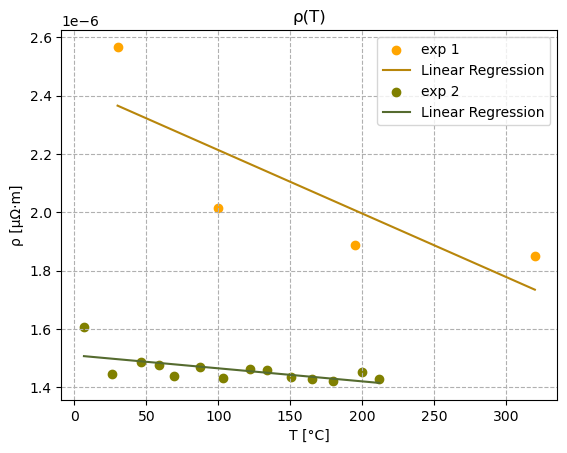

In [164]:

rho_HT_pred, drhodT_HT, MSEHT,model = lin_Reg(rho_HT_list, T)
rho_BT_pred, drhodT_BT, MSEBT,model = lin_Reg(rho_BT_list, T_pred)

plt.scatter(T, rho_HT_list, color='orange', label='exp 1')
plt.plot(T, rho_HT_pred, color='darkgoldenrod', label='Linear Regression')
plt.scatter(T_pred, rho_BT_list, color='olive', label='exp 2')
plt.plot(T_pred, rho_BT_pred, color='darkolivegreen', label='Linear Regression')

plt.xlabel('T [°C]')
plt.ylabel('ρ [μΩ·m]')
plt.title('ρ(T)')
plt.legend()
plt.grid(True, linestyle='dashed')
plt.show()



## Comparaison avec d'autres matériaux

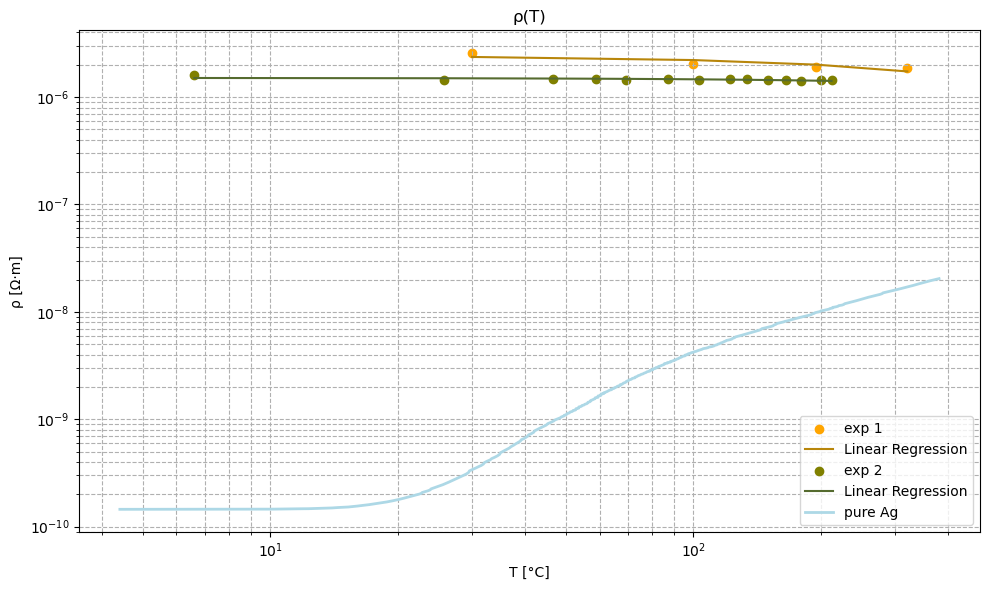

In [165]:

# Load the data from the CSV file
file_path = "RHO_Ag(T).csv"  # Update this path if the file is in a different location
data = pd.read_csv(file_path, sep=';', header=None, names=['Temperature', 'Resistivity'], decimal=',')

# Drop rows with missing or invalid values
data = data.dropna()

# Convert columns to numeric (if not already)
data['Temperature'] = pd.to_numeric(data['Temperature'], errors='coerce')
data['Resistivity'] = pd.to_numeric(data['Resistivity'], errors='coerce')

# Drop rows with non-numeric values
data = data.dropna()

# Group by Temperature and calculate the mean Resistivity for each Temperature
data_grouped = data.groupby('Temperature', as_index=False).mean()

# Apply a moving average to smooth the data
window_size = 10  # Adjust the window size for smoothing
data_grouped['Smoothed_Resistivity'] = data_grouped['Resistivity'].rolling(window=window_size, center=True).mean()
data_grouped['Smoothed_Resistivity'] *= 1e-8
# Drop rows with NaN values introduced by the rolling window
data_grouped = data_grouped.dropna()

# Plot the resistivity as a function of temperature on a log-log scale
plt.figure(figsize=(10, 6))

# Kanthal data
plt.scatter(T, rho_HT_list, color='orange', label='exp 1')
plt.plot(T, rho_HT_pred, color='darkgoldenrod', label='Linear Regression')
plt.scatter(T_pred, rho_BT_list, color='olive', label='exp 2')
plt.plot(T_pred, rho_BT_pred, color='darkolivegreen', label='Linear Regression')

# Ag data
plt.loglog(data_grouped['Temperature'], data_grouped['Smoothed_Resistivity'], linestyle='-', label='pure Ag',color = 'lightblue',linewidth=2)

# Add labels, title, and legend
plt.xlabel('T [°C]')
plt.ylabel('ρ [Ω·m]')
plt.title('ρ(T)')
plt.legend()
plt.grid(True, which="both", linestyle='dashed')

# Show the plot
plt.tight_layout()
plt.show()